# Efektywne programowanie w języku Python 

## wykład 8

![alt text](images/numpy_project_page.jpg "numpy")

## Wydajne obliczenia numeryczne

Standardowe typy danych i procedury Pythona nie nadają się do poważnych zastosowań numerycznych. Konieczne było opracowanie zoptymalizowanych pod względem typowych operacji numerycznych typów danych i procedur. Stworzony został **Numerical Python**, zwany w skrócie **NumPy**. Podczas rozwoju tego pakietu kierowano się podejściem zastosowanym w takich językach jak Basis, MATLAB, rodzina języków APL, FORTRAN i innych. Tak więc NumPy jest biblioteką Pythona służącą do obliczeń naukowych. Dostarcza ona listę matematycznych funkcji użytecznych w takich zagadnieniach jak:
- algebra liniowa,
- transformacje Fouriera,
- generowanie liczb losowych,
- oraz wszystkie operacje na tablicach i macierzach, które są podstawowymi obiektami w Numpy.

W numpy znajdziemy, m.in.
- `ndarray` - wydajną implementacjeę tablic wielowymiarowych umozliwiające szybkie wykonywanie operacji arytmetycznych,
- funkcje matematyczne przeznaczone do wykonywania szybkich operacji na calych tablicach bez potrzeby korzystania z pętli,
- narzędzia przeznaczone do zapisu i odczytu danych tablicowych.

In [1]:
import numpy
# lub
import numpy as np 

# Przyklad na rozgrzewkę

In [2]:
import numpy as np
a_arr = np.arange(1_000_000)
a_list = list(range(1_000_000))

In [3]:
%%timeit
for _ in range(10):
    a_arr2 = a_arr * 2

39.8 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
for _ in range(10):
    a_list2 = [x * 2 for x in a_list]

1.47 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Generalnie jest of 10 do 1000 razy szybciej, jeśli umiemy numpy.

## Tworzenie macierzy

Do stworzenia tablicy jedno-, dwu- i wielowymiarowej używamy funkcji **array** - przyjmuje ona dowolny obiekt będący sekwencją i generuje nowa tablice  numpy

In [5]:
x = np.array([1,2,3]) # tablica jednowymiarowa
A = np.array([[1,2,3] , [4,5,6]]) # tablica dwuwymiarowa
B = np.array( [[[1,1,1],[1,1,1]], [[2,2,2],[2,2,2]]]) # wielowymiarowa

print('x=',  x, '\n')
print('A=', A, '\n')
print('B=', B, '\n')

x= [1 2 3] 

A= [[1 2 3]
 [4 5 6]] 

B= [[[1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]]] 



Tablica ma wymiar i kasztalt

In [6]:
x = np.array([[1,2,3],[2,3,4]]) # tablica dwuwymiarowa

In [7]:
x.ndim

2

In [8]:
x.shape

(2, 3)

Przy tworzeniu tablicy istnieje możliwość zadeklarowania jej typu:

In [9]:
z = np.array( [[1,0], [0,1]], dtype=complex) # tablica liczb zespolonych
print(z)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


Jesli typ nie zostanie okreslony, numpy zrobi to za nas, informacje te zostaną sapisane w polu `dtype`

In [10]:
z.dtype

dtype('complex128')

Do tworzenia tablicy jednowymiarowej (wektora) składającego się z elementów z danego zakresu używamy polecenia **arange(start, stop, krok)**:

In [11]:
print(np.arange(10), '\n')
print(np.arange(0, 10, 2), '\n')
print(np.arange(0., 10, 0.5))

[0 1 2 3 4 5 6 7 8 9] 

[0 2 4 6 8] 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


Jeśli chcemy wygenerować tablicę o określonej liczbie z danego przedziału, używamy funkcji linspace:

In [12]:
print(np.linspace(0., 10., 3), '\n')
print(np.linspace(0., 1., 5))

[ 0.  5. 10.] 

[0.   0.25 0.5  0.75 1.  ]


Biblioteka Numpy oferuje wiele możliwości budowania typowych tablic:

In [13]:
print(np.ones((3,3)), '\n') # dwuwymiarowa tablica (3x3) wypełniona jedynkami
print(np.zeros((3,2)), '\n') # dwuwymiarowa tablica (3x2) wypełniona zerami
print(np.eye(4)) # macierz jednostkowa 4x4

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]
 [0. 0.]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Korzystając z powyższych funkcji możemy w łatwy sposób tworzyć dowolne macierze, zmieniając ich rozmiary.

In [14]:
print(np.arange(15).reshape(5,3), '\n')
print(np.linspace(0., 1, 15).reshape(5,3))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

[[0.         0.07142857 0.14285714]
 [0.21428571 0.28571429 0.35714286]
 [0.42857143 0.5        0.57142857]
 [0.64285714 0.71428571 0.78571429]
 [0.85714286 0.92857143 1.        ]]


## Uwaga:
Metoda `np.empty` może zwrócić coś innego niż macierz z zerami więc nie zakładamy, że zwrac taką macierz.

In [93]:
np.empty((10, 10))

array([[ 1.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,  1.,  2.],
       [ 3.,  2.,  3.,  2.,  3.,  2.,  3.,  4.,  5.,  6.],
       [ 5.,  6.,  7.,  6.,  7.,  6.,  5.,  4.,  5.,  6.],
       [ 5.,  4.,  3.,  4.,  5.,  6.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 13., 12., 13., 12.],
       [11., 10., 11., 10.,  9., 10., 11., 12., 11., 10.],
       [ 9., 10., 11., 10., 11., 10.,  9., 10., 11., 12.],
       [11., 10.,  9., 10., 11., 12., 11., 12., 11., 12.],
       [11., 12., 13., 12., 11., 10.,  9.,  8.,  9.,  8.],
       [ 9., 10.,  9.,  8.,  7.,  6.,  5.,  6.,  5.,  6.]])

## Metody `_like` 
Metody `ones_like`, `zero_like` itd. tworzą tablice o takim samy rozmiarze i wypełniają ją odpowiednimi wartościami

In [16]:
x = np.linspace(0., 1, 12).reshape(4,3)
print(x)

[[0.         0.09090909 0.18181818]
 [0.27272727 0.36363636 0.45454545]
 [0.54545455 0.63636364 0.72727273]
 [0.81818182 0.90909091 1.        ]]


In [17]:
np.ones_like(x)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# Typy danych

| Data type |Description |
|---|---|
| bool_	| Boolean (True or False) stored as a byte|
|int_	|Default integer type (same as C long; normally either int64 or int32)|
|intc	|Identical to C int (normally int32 or int64)|
|intp	|Integer used for indexing (same as C ssize_t; normally either int32 or int64)|
|int8	|Byte (-128 to 127)|
|int16	|Integer (-32768 to 32767)|
|int32|	Integer (-2147483648 to 2147483647)|
|int64|	Integer (-9223372036854775808 to 9223372036854775807)|
|uint8|	Unsigned integer (0 to 255)|
|uint16|	Unsigned integer (0 to 65535)|
|uint32|Unsigned integer (0 to 4294967295)|
|uint64	|Unsigned integer (0 to 18446744073709551615)|
|float_	|Shorthand for float64.|
|float16|	Half precision float: sign bit, 5 bits exponent, 10 bits mantissa|
|float32|	Single precision float: sign bit, 8 bits exponent, 23 bits mantissa|
|float64	|Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|
|complex_|Shorthand for complex128.|
|complex64	|Complex number, represented by two 32-bit floats|
|complex128|	Complex number, represented by two 64-bit floats|

https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In [18]:
arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int32')

In [19]:
arr2 = arr.astype(np.float64)
arr2.dtype

dtype('float64')

In [20]:
print(arr2)

[1. 2. 3. 4.]


In [78]:
arr = np.array(['12', '-0.1', '2.3'])

In [79]:
arr

array(['12', '-0.1', '2.3'], dtype='<U4')

In [23]:
arr.astype(float)

array([12. , -0.1,  2.3])

## Operacje na indeksach

In [3]:
import numpy as np
x = np.arange(15).reshape(5,3)
print(x, '\n')
print(x[:,0], '\n')

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

[ 0  3  6  9 12] 



In [25]:
A = np.arange(20).reshape(5,4)
print(A, '\n')
print(A[2, 3])
print(A[2][3], '\n') # równoważnie
print(A[2], '\n') # trzeci wiersz
print(A[:, 2]) # trzecia kolumna

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

11
11 

[ 8  9 10 11] 

[ 2  6 10 14 18]


Aby wyświetlić fragment tablicy od  `n−1`  do `m−1`  elementów używamy składni: `tablica[n:m]`, analogicznie aby wyświetlić elementy tablicy pomiędzy  `n−1` , a  `m−1`  przesuwając się o wartość  `k`  używamy składni `tablica[n:m:k]`.

In [26]:
x = np.arange(15)
print(x, '\n')
print(x[3:11], '\n')
print(x[3:11:2], '\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

[ 3  4  5  6  7  8  9 10] 

[3 5 7 9] 



In [5]:
A = np.arange(20).reshape(5,4)
print(A,'\n')
print(A[2:4], '\n') # wiersze od trzeciego do czwartego
print(A[:,2:4], '\n') # trzecia i czwarta kolumnę
print(A[:,[2,3]]) # równoważnie

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 8  9 10 11]
 [12 13 14 15]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]


Tablice można też budować w oparciu o już istniejące:

In [28]:
A = np.arange(20).reshape(5,4)
print(A, '\n')

B = A[2:4, 2:].copy()
print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[10 11]
 [14 15]]


## Zmiana rozmiaru, kształtu tablicy

Do zmiany rozmiaru tablicy już utworzonej służy funkcja: **reshape**. Operacja ta nie zmieni zawartości oryginalnej tablicy, pokaże jedynie jej elementy w zadanej postaci.

In [81]:
A = np.arange(8)
print(A,'\n')
print(A.reshape((2, 4)), '\n')
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]] 

[0 1 2 3 4 5 6 7]


Aby zmienić kształt tablicy za pomocą funkcji reshape możemy zrobić tak:

In [96]:
A = np.arange(8)
print(A,'\n')
A2 = A.reshape((2, 4))
print(A2)
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]]
[0 1 2 3 4 5 6 7]


lub użyć funkcję resize:

In [94]:
A = np.arange(8)
print(A,'\n')
A.resize(2, 4)
# print(A.resize(2, 4), '\n')
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]]


Do sprawdzenia wymiaru tablicy służy pole **shape**:

In [32]:
A = np.arange(20).reshape(5,4)
print(A.shape, '\n') # wymiar tablicy
print(A.shape[0], '\n') # pierwszy wymiar
print(A.shape[1], '\n') # drugi wymiar
print(A.size) # liczba wszystkich elementów w tablicy 

(5, 4) 

5 

4 

20


Transpozycja macierzy:

In [33]:
A = np.arange(8).reshape(2,4)
print(A, '\n')
print(A.T, '\n')
print(np.transpose(A))

[[0 1 2 3]
 [4 5 6 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]]


Podobnie jak przy funkcji `reshape` aby zachować wynik transpozycji macierzy musimy go przypisać do nowej zmiennej.

Aby zmienić tablicę na jednowymiarową, możemy użyć polecenia:

In [34]:
A = np.arange(8).reshape(2,4)
print(A, '\n')
print(np.ravel(A), '\n')
print(A.reshape(-1,))

[[0 1 2 3]
 [4 5 6 7]] 

[0 1 2 3 4 5 6 7] 

[0 1 2 3 4 5 6 7]


## Dodawanie, usuwanie elementów

Do dodania elementu, kolumny lub wiersza do tablicy w ustalonej pozycji/lokalizacji używamy polecenia **insert**:

In [22]:
A = np.array([[1, 1], [2, 2], [3, 3]])
print(A, '\n')
print(np.insert(A, 1, 5), '\n')
print(A, '\n')
print(np.insert(A, 2, 5, axis=1), '\n') # wstawienie drugiej kolumny
print(np.insert(A, 1, [4, 5, 6], axis=1), '\n') # wstawienie drugiej kolumny
print(np.insert(A, 3, 4, axis=0)) # wstawienie wiersza kolumny

[[1 1]
 [2 2]
 [3 3]] 

[1 5 1 2 2 3 3] 

[[1 1]
 [2 2]
 [3 3]] 

[[1 1 5]
 [2 2 5]
 [3 3 5]] 

[[1 4 1]
 [2 5 2]
 [3 6 3]] 

[[1 1]
 [2 2]
 [3 3]
 [4 4]]


https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.insert.html

Aby dodać element(-y) na koniec tablicy należy użyć funkcji **append**:

In [18]:
import numpy as np
print(np.append([1, 2, 3], [4, 5, 6]), '\n')
print(np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]]), '\n')
print(np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0))

[1 2 3 4 5 6] 

[1 2 3 4 5 6 7 8 9] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Biblioteka NumPy umożliwia nam także usuwanie wybranych elementów, wierszy lub kolumn z tablicy:

In [37]:
A = np.arange(20).reshape(5,4)
print(A, '\n')

print(np.delete(A, 1, axis=0), '\n')
print(A, '\n')
print(np.delete(A, [1, 2], 1), '\n')
print(np.delete(A, [1, 2, 5, 7, 9, 12, 17, 19]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 0  3]
 [ 4  7]
 [ 8 11]
 [12 15]
 [16 19]] 

[ 0  3  4  6  8 10 11 13 14 15 16 18]


## Podstawowe operacje na tablicach

Wiele z tych funkcji to operacje element po elemencie

### Dodawanie

In [23]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x,'\n',v,'\n')
print (v,'\n')
print(x+v)
print(np.add(x, v),'\n') # równoważnie
print(x+1, '\n')

A = np.arange(15, 30).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A+B)
print(np.add(A, B))
print(A+5, '\n')

x = np.array([1,2,3])
print(A, '\n')
print(x, '\n')
print(np.add(A, x)) # dodawanie do każdego wiersza wektora x

[1 4 6 2 5] 
 [0 1 2 3 4] 

[0 1 2 3 4] 

[1 5 8 5 9]
[1 5 8 5 9] 

[2 5 7 3 6] 

[[15 17 19]
 [21 23 25]
 [27 29 31]
 [33 35 37]
 [39 41 43]]
[[15 17 19]
 [21 23 25]
 [27 29 31]
 [33 35 37]
 [39 41 43]]
[[20 21 22]
 [23 24 25]
 [26 27 28]
 [29 30 31]
 [32 33 34]] 

[[15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]] 

[1 2 3] 

[[16 18 20]
 [19 21 23]
 [22 24 26]
 [25 27 29]
 [28 30 32]]


### Odejmowanie

In [39]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x-v)
print(np.subtract(x, v)) # równoważnie
print(x-1, '\n')

A = np.arange(15, 30).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A-B)
print(np.subtract(A, B))
print(A-1, '\n')

x = np.array([1,2,3])
print(np.subtract(A, x)) # odjęcie od każdego wiersza wektora x

[ 1  3  4 -1  1]
[ 1  3  4 -1  1]
[0 3 5 1 4] 

[[15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]]
[[15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]]
[[14 15 16]
 [17 18 19]
 [20 21 22]
 [23 24 25]
 [26 27 28]] 

[[14 14 14]
 [17 17 17]
 [20 20 20]
 [23 23 23]
 [26 26 26]]


### Mnożenie

In [40]:
x = np.array([1,4,6,2,5])
v = np.arange(5) #[0,1,2,3,4]
print(x*5, '\n')
print(np.dot(x,v), '\n') # iloczyn skalarny
print(x*v, '\n') # to nie, mnożony jest element przez element! 

A = np.array([[1, 3], [0, 6]])
print(A*5, '\n')

B = np.array([[-2, 6], [8, -2]])
print(np.dot(A, B), '\n')
print(A*B) # to nie, mnożony jest element przez element! 

[ 5 20 30 10 25] 

42 

[ 0  4 12  6 20] 

[[ 5 15]
 [ 0 30]] 

[[ 22   0]
 [ 48 -12]] 

[[ -2  18]
 [  0 -12]]


# UWAGA NA MNOŻENIE MACIERZY

In [41]:
A = np.matrix( ((2,3), 
                (3, 5)) )
B = np.matrix( ((1,2), 
                (5, -1)) )

print(A * B, '\n')
print(np.dot(A, B))

[[17  1]
 [28  1]] 

[[17  1]
 [28  1]]


### Potęgowanie

In [42]:
x = np.array([1,4,6,2,5])
print(x, '\n')

print(x**2)
print(np.power(x, 2), '\n') # równoważnie

A = np.arange(9).reshape((3, 3))
print(A, '\n')
print(A**2, '\n') # kwadrat elementów tablicy
print(np.power(A, 2)) # równoważnie

[1 4 6 2 5] 

[ 1 16 36  4 25]
[ 1 16 36  4 25] 

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


Więcej funkcji można znaleźć tutaj https://docs.scipy.org/doc/numpy/reference/routines.math.html

## Porównania elementów tablic

In [16]:
A = np.arange(5, 20).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A)
print(A < B, '\n')
print(A == A, '\n')
print(A == 17, '\n')
print(np.any( A > 17 ), '\n') # prawdziwe, jeśli każdy element z osobna spełnia warunek 
print(np.all( A > 17 )) # prawdziwe jeśli wszystkie elementy spełniają warunek

[[ 5  6  7]
 [ 8  9 10]
 [11 12 13]
 [14 15 16]
 [17 18 19]]
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]] 

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]] 

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [ True False False]] 

True 

False


## Łączenie i dzielenie tablic

Biblioteka NumPy daje nam narzędzia dzięki, którym możemy łączyć i dzielić tablice.

In [38]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])

print(x, '\n')
print(y, '\n')
# łączenie wierszowe
print(np.concatenate((x, y), axis=0), '\n')
print(np.vstack((x,y)), '\n')

# łączenie kolumnowe
print(np.concatenate((x,y.T), axis=1), '\n')
print(np.hstack((x,y.T)))

[[1 2]
 [3 4]] 

[[5 6]] 

[[1 2]
 [3 4]
 [5 6]] 

[[1 2]
 [3 4]
 [5 6]] 

[[1 2 5]
 [3 4 6]] 

[[1 2 5]
 [3 4 6]]


Mamy też możliwość podziału tablicy na podtablice:

# Dzielenie na podtablice

In [40]:
x = np.arange(9)
print(x, '\n')
print(np.split(x, 3), '\n') # podział na 3 podtablice
print(np.split(x, [2, 4, 7]), '\n') # podział na 4 podtablice o 
                                # wskazanych początkach

x = x.reshape((3, 3))
print(x, '\n')
b = np.split(x, 3, axis=1), '\n'
print(np.split(x, 3, axis=1), '\n')
x[0,0]=22
print("b ",b)
# podział ze względu na kolumny
print("kolumny")
x = np.arange(16.0).reshape(4, 4)
print(x, '\n')
print(np.hsplit(x, 2), '\n')
print(np.hsplit(x, [1, 3]), '\n')

# podział ze względu na wiersze
print(np.vsplit(x, 2), '\n')
print(np.vsplit(x, [1, 3]), '\n')

[0 1 2 3 4 5 6 7 8] 

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])] 

[array([0, 1]), array([2, 3]), array([4, 5, 6]), array([7, 8])] 

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[array([[0],
       [3],
       [6]]), array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]])] 

b  ([array([[22],
       [ 3],
       [ 6]]), array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]])], '\n')
kolumny
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]] 

[array([[ 0.,  1.],
       [ 4.,  5.],
       [ 8.,  9.],
       [12., 13.]]), array([[ 2.,  3.],
       [ 6.,  7.],
       [10., 11.],
       [14., 15.]])] 

[array([[ 0.],
       [ 4.],
       [ 8.],
       [12.]]), array([[ 1.,  2.],
       [ 5.,  6.],
       [ 9., 10.],
       [13., 14.]]), array([[ 3.],
       [ 7.],
       [11.],
       [15.]])] 

[array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]]), array([[ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])] 

[array([[0., 1., 2., 

## Wybrane metody z algebry linowej

Do części funkcji typowych dla algebry liniowej możemy się odwołać po zaimportowaniu biblioteki **linalg** będącej integralną częścią biblioteki NumPy.

In [46]:
import numpy.linalg as alg 

### Macierz odwrotna

In [47]:
A = np.array([[1., 2.], [3., 4.]])
invA = alg.inv(A)
print(invA)
print(np.dot(A, invA))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


### Wyznacznik

In [48]:
print(A)
print(alg.det(A))

[[1. 2.]
 [3. 4.]]
-2.0000000000000004


### Ślad

In [49]:
print(A)
print(np.trace(A))

[[1. 2.]
 [3. 4.]]
5.0


### Norma dla macierz lub wektora

In [50]:
print(alg.norm(A)) # Euklidesowa
print(alg.norm(A, 'fro')) # Frobeniusa https://pl.wikipedia.org/wiki/Norma_macierzowa
print(alg.norm(A, np.inf)) # maksimum

print(alg.norm(A, axis=0)) # wierszy
print(alg.norm(A, axis=1)) # kolumn

5.477225575051661
5.477225575051661
7.0
[3.16227766 4.47213595]
[2.23606798 5.        ]


### Rozwiązywanie układów równań

In [51]:
# 4*x_1 + x_2 = 10
# 3*x_1 = 7
A = np.array([[4,1], [3,0]])
b = np.array([10,7])
print(np.linalg.solve(A, b))

[2.33333333 0.66666667]


### Dekompozycje macierzy

In [52]:
# QR
A = np.array([[0, 1], [1, 1], [1, 1], [2, 1]])
q, r = alg.qr(A)
print(q)
print(r)

[[ 0.          0.8660254 ]
 [-0.40824829  0.28867513]
 [-0.40824829  0.28867513]
 [-0.81649658 -0.28867513]]
[[-2.44948974 -1.63299316]
 [ 0.          1.15470054]]


In [53]:
# SVD
A = np.random.randn(4, 3)
U, s, V = np.linalg.svd(A)
print(U, '\n')
print(s, '\n')
print(V, '\n')

S = np.zeros((4, 3))
S[:3, :3]  = np.diag(s)
print(np.allclose(A, np.dot(U, np.dot(S, V))))

[[-0.83048078  0.26754616 -0.37347641  0.31501761]
 [-0.38913614  0.06142141  0.14355458 -0.90785051]
 [ 0.02527634 -0.696557   -0.69705383 -0.16818267]
 [-0.39778869 -0.66291387  0.59499867  0.21974062]] 

[4.12510642 2.46831733 1.98929624] 

[[-0.3003048   0.81717903 -0.49197099]
 [ 0.92259298  0.11790664 -0.36731487]
 [-0.24215536 -0.5641954  -0.78933157]] 

True


In [54]:
# Cholesky A = L*L^T
A = np.array([[1,2],[2,5]])
L = np.linalg.cholesky(A)
print(L, '\n')

print(np.allclose(A, np.dot(L, L.T)))

[[1. 0.]
 [2. 1.]] 

True


## Statystyka

NumPy oferuje dużo możliwości generacji liczb losowych. Poniżej podaję niektóre z nich, więcej można znaleźć tutaj https://docs.scipy.org/doc/numpy/reference/routines.random.html

In [49]:
# macierz losowa 3x2 (liczby z przedziału [0, 1)) 
print(np.random.rand(3,2), '\n')

# macierz losowa 2x3 o elementach z rozkładu N(mu, sigma^2) = N(1, 4)
print(2 * np.random.randn(2, 3) + 1, '\n')

# macierz losowa 3x3 o elementach całkowitych z przedziału [0, 5)
print(np.random.randint(5, size=(3, 3)), '\n')

print(np.random.randint(5,22,21), '\n')

# losowe wybranie 3 liczb z [0, 1, 2, 3, 4]
print(np.random.choice(5, 3, replace=False), '\n')

[[0.75175943 0.27518486]
 [0.73089722 0.0166847 ]
 [0.67602396 0.60891209]] 

[[ 1.53957119  2.16268777 -3.77326116]
 [ 2.17786588 -1.51161551  0.04463651]] 

[[2 0 0]
 [0 1 4]
 [0 1 0]] 

[ 8 17 16 17  5 16 12 12 20 20 14  6 14 14 19  6  6 18 10 10 17] 

[4 2 1] 



In [56]:
# rozkład wykładniczy (scale = 1/lambda)
print(numpy.random.exponential(scale=1.0, size=(2, 3)), '\n')

# rozkład geometryczny
print(np.random.geometric(p=0.35, size=(2,4)), '\n')

# rozkład normalny N(mu, sigma)
print(np.random.    (0.0, 1, size=7), '\n')

# rozkład Poissona
print(np.random.poisson(5, 10), '\n')

[[1.12954416 0.23301822 0.64832748]
 [1.8456717  1.49091059 0.64147814]] 

[[1 4 1 2]
 [1 7 1 2]] 

[-0.67425383 -0.53054503 -0.74880459  0.9914856  -0.74663953 -2.08829194
  0.13797484] 

[4 7 6 1 5 5 4 7 2 8] 



In [57]:
# rozkład wielowymiarowy rozkład normalny
mean = [5, -5]
cov = [[10, -6], [-6, 5]]
print(np.random.multivariate_normal(mean, cov, 7), '\n')

[[ 2.37246644 -2.44024247]
 [ 0.66352968 -3.48286189]
 [ 8.48747023 -5.77279838]
 [ 2.00075528 -2.52949224]
 [ 2.75902541 -4.49780433]
 [ 8.88802867 -6.88924336]
 [ 5.02142286 -5.34803957]] 



In [ ]:
import numpy as np
a = np.a

### Proste statystyki

In [58]:
x = np.random.normal(2.0, 2.5, size=7)

print(x.max(),'\n') #maksymalna wartość

print(x.min(),'\n') # minimalna wartość 

print(x.sum(),'\n') # suma wszystkich elementów 

print(x.prod(),'\n') # iloczyn wszystkich elementów 

6.727733843596366 

-0.38633819650292844 

9.423240288336569 

0.20367265662937484 



In [59]:
print(x.mean()) # średnia z wszystkich elementów
print(np.mean(x),'\n')

print(np.median(x),'\n') # mediana

print(x.std()) # odchylenie standardowe 
print(np.std(x),'\n')

print(x.var()) # wariancja
print(np.var(x))

1.3461771840480812
1.3461771840480812 

0.5628005212295044 

2.270877058748569
2.270877058748569 

5.156882615950551
5.156882615950551


In [5]:
A = np.array( [[4, 3, -5, 7], [40, -100, 20, 27], [10, 44, 0, 11]] ) 

print(A,'\n')

print(A.min(),'\n') # najmniejsza wartość w całej tablicy
print(A.max(),'\n') # największa wartość w całej tablicy 

print(A.min(0)) # najmniejsza wartość w każdej z kolumn
print(np.min(A, axis=0),'\n')

print(A.min(1),'\n') # najmniejsza wartość w każdym z wierszy 

print(np.cov(A))

[[   4    3   -5    7]
 [  40 -100   20   27]
 [  10   44    0   11]] 

-100 

44 

[   4 -100   -5    7]
[   4 -100   -5    7] 

[  -5 -100    0] 

[[   26.25          -7.25          34.25      ]
 [   -7.25        4228.91666667 -1163.91666667]
 [   34.25       -1163.91666667   366.91666667]]


## Sortowanie i przeszukiwanie tablicy

Biblioteka NumPy ma także funkcje sortujące elementy tablicy

In [61]:
x = np.random.randint(20, size=10)
print(x,'\n')
print(np.sort(x)) # quicksort
print(np.sort(x, kind='mergesort'), '\n')

[16 12  8 10 13  4 16  9  4 16] 

[ 4  4  8  9 10 12 13 16 16 16]
[ 4  4  8  9 10 12 13 16 16 16] 



In [20]:
A = np.array([[1,4],[3,1]]) 
print(A, '\n')
print(np.sort(A), '\n') # sortowanie względem ostatniej osi
print(np.sort(A, axis=0), '\n')
print(np.sort(A, axis=None)) # wszystkich elementów

[[1 4]
 [3 1]] 

[[1 4]
 [1 3]] 

[[1 1]
 [3 4]] 

[1 1 3 4]


In [63]:
dtype = [('name', 'S10'), ('height', float), ('age', int)]
values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),
          ('Galahad', 1.7, 38)]
A = np.array(values, dtype=dtype)  # tworzenie tablicy strukturalnej
print(A, '\n')
print(np.sort(A, order='height') )

[(b'Arthur', 1.8, 41) (b'Lancelot', 1.9, 38) (b'Galahad', 1.7, 38)] 

[(b'Galahad', 1.7, 38) (b'Arthur', 1.8, 41) (b'Lancelot', 1.9, 38)]


In [100]:
# indeksy posortowanej tablicy
x = np.array([3, 1, 2])
             
print(np.argsort(x), '\n')

A = np.array([[1,4],[3,1]]) 
print(A, '\n')
print(np.argsort(A, axis=1))

[1 2 0] 

[[1 4]
 [3 1]] 

[[0 1]
 [1 0]]


Numpy daje nam możliwość przeszukiwania tablicy:

In [65]:
# znajdowanie indeksu największego elementu w tablicy
A = np.random.randint(20, size=(3, 6))
print(A, '\n')
print(np.argmax(A), '\n') # indeks dla największego elementu w całej tablicy

print(np.argmax(A, axis=0)) # indeksy dla największych elementów w kolumnach

print(np.argmax(A, axis=1)) # indeksy dla największych elementów w wierszach

[[ 8  1 14  0  3 15]
 [ 7 14 12  0 15  5]
 [19  9 17 12  4  8]] 

12 

[2 1 2 2 1 0]
[5 4 0]


Analogicznie jak wyżej można znajdować indeks(-y) dla najmniejszej wartości, korzystając z funkcji argmin.
Można także znajdować indeksy tych elementów tablicy, które spełniają pewien warunek.

In [66]:
A = np.random.randint(20, size=(3, 6))
print(A, '\n')
print(np.where(A>5), '\n')
print(np.argwhere(A>5))

[[19  5 18 16 19 13]
 [ 4 10 19 12 15  5]
 [10  3 12  2  5 11]] 

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2], dtype=int64), array([0, 2, 3, 4, 5, 1, 2, 3, 4, 0, 2, 5], dtype=int64)) 

[[0 0]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [2 0]
 [2 2]
 [2 5]]


## Odczytywanie i zapisywanie tablic do/ z pliku

Oprócz powyższych operacji, biblioteka NumPy posiada jeszcze funkcje importujące i eksportujące dane z i do pliku

### Zapisyanie danych - funkcja savetxt

In [21]:
A = np.arange(0.0,5.0,1.0)

print(A)

np.savetxt('test1.out', A, delimiter=',')
with open('test1.out') as f: print(f.read())
    
np.savetxt('test2.out', (A,A,A))   # x,y,z equal sized 1D arrays
with open('test2.out') as f: print(f.read())

np.savetxt('test3.out', A, fmt='%1.4e')   # use exponential notation 
with open('test3.out') as f: print(f.read())

[0. 1. 2. 3. 4.]
0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00

0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00

0.0000e+00
1.0000e+00
2.0000e+00
3.0000e+00
4.0000e+00



### Odczytywanie danych - funkcja loadtxt

In [68]:
f = open('test1.out', 'r')
B = np.loadtxt(f, delimiter=', ')
f.close()
    
print(B)

[0. 1. 2. 3. 4.]


Zapis odczyt mozliwy także z wykorzystaniem `np.save` oraz `np.load`

### Jeśli brakuje danych to  np.genfromtxt (https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)

## Wydajność

In [69]:
from timeit import timeit

print(timeit('np.arange(100000).sum()', setup='import numpy as np', number=1000))
print(timeit('sum(range(100000))', number=1000))

0.2654513000000023
3.4091036999999993


Źródła:
- http://cs231n.github.io/python-numpy-tutorial/#numpy
- https://www.tutorialspoint.com/numpy/
- https://www.datacamp.com/community/tutorials/python-numpy-tutorial
- https://www.youtube.com/watch?v=h3l4qz76JhQ
- https://www.youtube.com/watch?v=68gDyk3ziIU
- https://www.youtube.com/watch?v=EEUXKG97YRw

# Programowanie z użyciem tablic

In [70]:
points = np.arange(-5, 5, 0.01)
xs, ys = np. meshgrid(points, points)

In [71]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [72]:
z = np.sqrt(xs **2 + ys ** 2)

Text(0.5, 1.0, 'funkcja $\\sqrt{x^2+y^2}$')

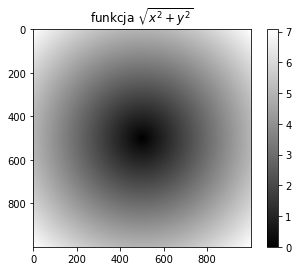

In [73]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("funkcja $\sqrt{x^2+y^2}$")

## Przykład 2

In [101]:
nsteps = 1000
draws= np.random.randint(0,2, size=nsteps)

In [102]:
steps = np.where(draws > 0, 1, -1)

In [103]:
walk = steps.cumsum()

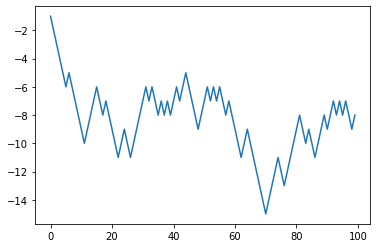

In [104]:
plt.plot(walk[:100])

Obszerny wykład:

https://www.youtube.com/watch?v=poD8ud4MxOY

pamiętaj x=a[0:2].copy() inaczej przekazujesz tylko referencję i zmiany propagują się na obu tabelach

In [7]:
a[np.ix_([0,2],[2,3,4])]  #(elementy o indexach (0,2)(0,3)(0,4)(2,2)...)
a[:2,...] # co drugi wiersz reszta przepisz
a[2,3,np.newaxis()] # z tablicy 5x5 robi 5x5x1

NameError: name 'a' is not defined

# tablice 2D ze skipem

In [8]:
a = np.arange(20).reshape(5,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [97]:
np.lib.stride_tricks.as_strided(a,shape=(15,2,2), strides=(4,16,4))

array([[[ 0,  1],
        [ 4,  5]],

       [[ 1,  2],
        [ 5,  6]],

       [[ 2,  3],
        [ 6,  7]],

       [[ 3,  4],
        [ 7,  8]],

       [[ 4,  5],
        [ 8,  9]],

       [[ 5,  6],
        [ 9, 10]],

       [[ 6,  7],
        [10, 11]],

       [[ 7,  8],
        [11, 12]],

       [[ 8,  9],
        [12, 13]],

       [[ 9, 10],
        [13, 14]],

       [[10, 11],
        [14, 15]],

       [[11, 12],
        [15, 16]],

       [[12, 13],
        [16, 17]],

       [[13, 14],
        [17, 18]],

       [[14, 15],
        [18, 19]]])

In [32]:
import numpy as np
a = np.arange(75).reshape(5,5,3)
print(a)

print(a[::,[0,-1],[0,-1]])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]

 [[30 31 32]
  [33 34 35]
  [36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]
  [54 55 56]
  [57 58 59]]

 [[60 61 62]
  [63 64 65]
  [66 67 68]
  [69 70 71]
  [72 73 74]]]
[[ 0 14]
 [15 29]
 [30 44]
 [45 59]
 [60 74]]


In [61]:
a = np.arange(20).reshape(5,4)
print(a)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [73]:
np.lib.stride_tricks.as_strided(np.ravel(a),shape=(5,4),strides=np.ravel(a).strides*2)

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [51]:
a = np.arange(11)
np.lib.stride_tricks.as_strided(a,shape=(5,2), strides=a.strides*2)

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5]])

In [83]:
a = np.arange(20).reshape(5,4)
print(a)
print(np.einsum('ij->i',a)) #sumuje po brakujących wymiarach

np.einsum('ij, jk -> ik', A, B) # to samo co np.dot(A,B) to samo po lewej oznacza mnożenie a to co na prawo oznacza sumę po tych wymiarach

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[ 6 22 38 54 70]


# Konwolucja

In [84]:
matrix = np.arange(25).reshape(5,5)
print(matrix)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [85]:
conv_filtrer= np.array([[1,1,0],[1,2,3],[0,1,1]])
print(conv_filtrer)

[[1 1 0]
 [1 2 3]
 [0 1 1]]


In [90]:
fiterShape = conv_filtrer.shape
conv_shape = tuple(np.subtract(matrix.shape,fiterShape)+1) +fiterShape
conv_strides = matrix.strides*2
print(conv_shape)
print(conv_strides)

(3, 3, 3, 3)
(20, 4, 20, 4)


In [91]:
sub_matrixes = np.lib.stride_tricks.as_strided(matrix,conv_shape,conv_strides)

In [92]:
print(matrix)
print(sub_matrixes)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[[[ 0  1  2]
   [ 5  6  7]
   [10 11 12]]

  [[ 1  2  3]
   [ 6  7  8]
   [11 12 13]]

  [[ 2  3  4]
   [ 7  8  9]
   [12 13 14]]]


 [[[ 5  6  7]
   [10 11 12]
   [15 16 17]]

  [[ 6  7  8]
   [11 12 13]
   [16 17 18]]

  [[ 7  8  9]
   [12 13 14]
   [17 18 19]]]


 [[[10 11 12]
   [15 16 17]
   [20 21 22]]

  [[11 12 13]
   [16 17 18]
   [21 22 23]]

  [[12 13 14]
   [17 18 19]
   [22 23 24]]]]


In [99]:
convolowed = np.einsum('ij,ijkl -> kl', conv_filtrer,sub_matrixes)
print(convolowed)

[[ 62  72  82]
 [112 122 132]
 [162 172 182]]


In [101]:
np.arange(2,11).reshape(3,3)

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

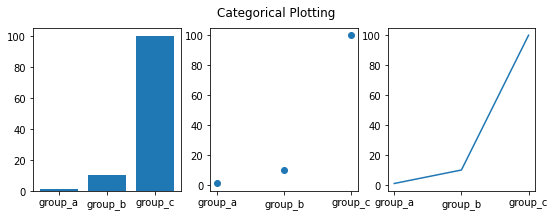

In [108]:
import matplotlib.pyplot  as plt
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

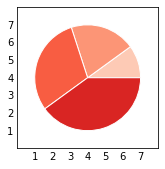

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, len(x)))
# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

[None, None]

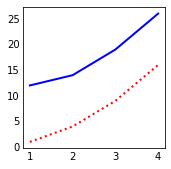

In [58]:
x= [1, 2, 3, 4]
y = [1, 4, 9, 16]

x2= [1, 2, 3, 4]
y2 = [12, 14, 19, 26]
line = plt.plot(x, y)
line2 = plt.plot(x2, y2)
plt.setp(line, color='r', linewidth=2.0, linestyle=':')
# or MATLAB style string value pairs
plt.setp(line2, 'color', 'b', 'linewidth', 2.0)

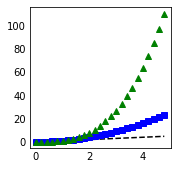

In [56]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'k--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

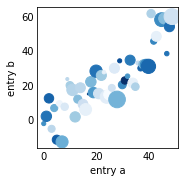

In [139]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

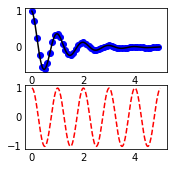

In [146]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

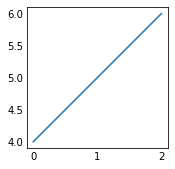

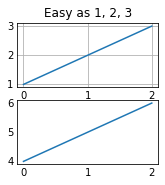

In [148]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # first figure current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in the first figure
                             # current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.grid(True)

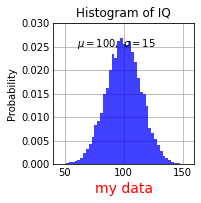

In [159]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='b', alpha=0.75)

plt.xlabel('my data', fontsize=14, color='red')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

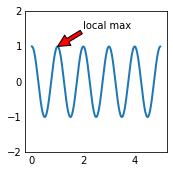

In [164]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(1, 1), xytext=(2, 1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

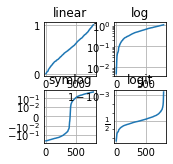

In [168]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

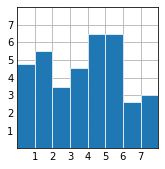

In [180]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

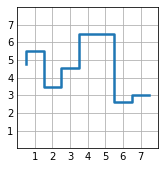

In [181]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.step(x, y, linewidth=2.5)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

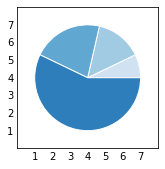

In [183]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 8]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


# def plot_linestyles(ax, linestyles, title):
#     X, Y = np.linspace(0, 100, 10), np.zeros(10)
#     yticklabels = []

#     for i, (name, linestyle) in enumerate(linestyles):
#         ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
#         yticklabels.append(name)

#     ax.set_title(title)
#     ax.set(ylim=(-0.5, len(linestyles)-0.5),
#            yticks=np.arange(len(linestyles)),
#            yticklabels=yticklabels)
#     ax.tick_params(left=False, bottom=False, labelbottom=False)
#     ax.spines[:].set_visible(False)

#     # For each line style, add a text annotation with a small offset from
#     # the reference point (0 in Axes coords, y tick value in Data coords).
#     for i, (name, linestyle) in enumerate(linestyles):
#         ax.annotate(repr(linestyle),
#                     xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
#                     xytext=(-6, -12), textcoords='offset points',
#                     color="blue", fontsize=8, ha="right", family="monospace")


# fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 3])

# plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
# plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

# plt.tight_layout()
# plt.show()

(-1.0, 5.0)

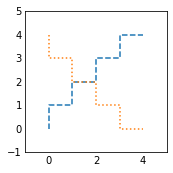

In [61]:
import matplotlib.pyplot as plt

plt.plot(range(5), range(5), linestyle='--', drawstyle='steps')
plt.plot(range(5), range(5)[::-1], linestyle=':', drawstyle='steps')
plt.xlim([-1, 5])
plt.ylim([-1, 5])